In [1]:
# Description: This strategy is based on technical indicator 'Moving Average Convergence Divergence (MACD)'
# Appliction method: When the MACD line crosses above the signal line, and when MACD is above 0,
# the code generates a buy signal and when MACD crosses below, generates a sell signal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('INFY_NSE_5Y.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-17,735.000000,740.000000,724.599976,725.950012,627.834839,5427054
1,2018-09-18,730.000000,730.000000,717.000000,719.099976,621.910583,7729732
2,2018-09-19,727.000000,727.000000,713.200012,719.750000,622.472778,4849498
3,2018-09-21,713.849976,717.400024,692.000000,705.299988,609.975830,14350769
4,2018-09-24,706.500000,729.950012,706.500000,718.250000,621.175476,8637881
...,...,...,...,...,...,...,...
1231,2023-09-11,1469.599976,1478.050049,1464.500000,1476.449951,1476.449951,4182226
1232,2023-09-12,1482.500000,1504.000000,1477.099976,1501.099976,1501.099976,6793161
1233,2023-09-13,1505.000000,1505.000000,1488.650024,1498.349976,1498.349976,4804686
1234,2023-09-14,1505.000000,1512.550049,1499.150024,1506.949951,1506.949951,6444213


In [4]:
# Constructing the MACD indicator 

df['12EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
df['26EMA'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12EMA'] - df['26EMA']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


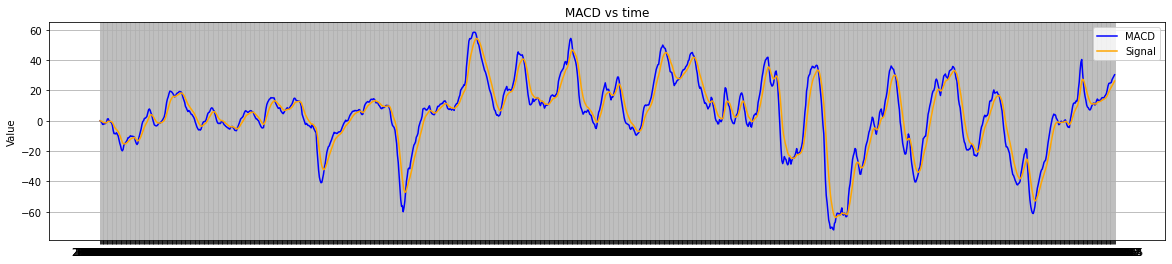

In [5]:
# plotting MACD for visualisation

plt.figure(figsize=(20,4))
plt.plot(df['Date'], df['MACD'], color='blue', label='MACD')
plt.plot(df['Date'], df['Signal'], color='orange', label='Signal')
plt.ylabel('Value')
plt.title('MACD vs time')
plt.grid(True)
plt.legend()


In [6]:
# Generating buy and sell signals based on the strategy

df['Trade'] = np.where((df['MACD'] > df['Signal']) & (df['MACD'] > 0), 1, 0)
df['Position'] = df['Trade'].diff()
df['Buy'] = np.where(df['Position'] == 1, df['Close'], np.NAN)
df['Sell'] = np.where((df['Position'] == -1) | ((df['Date'] == '2023-09-15') & df['Trade'] == 1), df['Close'], np.NAN)

In [7]:
# Trading Data

Buy_Trades = df['Buy'].dropna().reset_index(drop=True)
Sell_Trades = df['Sell'].dropna().reset_index(drop=True)
Trades = pd.DataFrame({'Buy': Buy_Trades, 'Sell': Sell_Trades})
Trades['Win/Lose'] = np.where(Trades['Sell'] > Trades['Buy'], 1, 0)
Trades

,Buy,Sell,Win/Lose
0,746.650024,707.200012,0
1,668.500000,667.049988,0
2,676.099976,725.900024,1
3,749.549988,750.450012,1
4,737.799988,727.500000,0
5,744.650024,739.200012,0
6,779.349976,768.849976,0
7,795.700012,829.849976,1
8,721.049988,702.099976,0
9,711.299988,727.900024,1


In [15]:
# Statistics

time_frame_yrs = 5
avg_share_price = np.mean(df['Close'])
profit_per_share = np.sum(df['Sell']) - np.sum(df['Buy'])
returns = profit_per_share / avg_share_price
cagr = (returns + 1) ** (1 / time_frame_yrs) - 1
avg_annual_returns = cagr * 100
win_percent = (np.sum(Trades['Win/Lose']) / len(Trades))*100
lose_percent = 100 - win_percent

In [16]:
avg_share_price

1188.0849120493529

In [17]:
profit_per_share

651.3500399999903

In [18]:
cagr

0.09135838814640707

In [19]:
avg_annual_returns

9.135838814640707

In [20]:
win_percent

46.15384615384615

In [21]:
lose_percent

53.84615384615385